<a href="https://colab.research.google.com/github/CaoHaiNam/CNN_MNIST/blob/master/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import collections
import numpy as np
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense

In [0]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

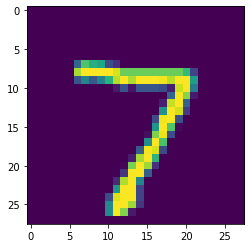

In [21]:
from matplotlib import pyplot as plt
plt.imshow(x_test[0], interpolation='nearest')
plt.show()

In [22]:
print(y_test[0])

7


In [0]:
x_train, x_test = x_train / 255.0, x_test / 255.0
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [0]:
model = tf.keras.models.Sequential([
     # 28x28x1
     Convolution2D(filters=6, kernel_size=(5,5), activation = 'relu', input_shape=input_shape),
     # 24x24x6
     MaxPooling2D(pool_size=(2, 2)),
     # 12x12x6
     Convolution2D(filters=16, kernel_size=(5,5), activation = 'relu'),
     # 8x8x16
     MaxPooling2D(pool_size=(2, 2)),
     # 4x4x16
     Flatten(),
     Dense(128, activation = 'relu'),
     Dense(84, activation = 'relu'),
     Dense(10, activation=tf.nn.softmax)])

In [0]:
model.summary()

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=32, validation_split=0.2, epochs=30, verbose=1)

Epoch 1/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0068 - accuracy: 0.9984 - val_loss: 0.1155 - val_accuracy: 0.9862
Epoch 2/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0042 - accuracy: 0.9989 - val_loss: 0.0904 - val_accuracy: 0.9898
Epoch 3/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0056 - accuracy: 0.9986 - val_loss: 0.1056 - val_accuracy: 0.9866
Epoch 4/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.1141 - val_accuracy: 0.9883
Epoch 5/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0056 - accuracy: 0.9985 - val_loss: 0.0973 - val_accuracy: 0.9886
Epoch 6/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0059 - accuracy: 0.9986 - val_loss: 0.1038 - val_accuracy: 0.9883
Epoch 7/30
1500/1500 [==============================] - 25s 17ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0928 -

In [8]:
print(model.metrics_names)
print(model.evaluate(x_train, y_train, verbose=2))
print(model.evaluate(x_test, y_test, verbose=2))

['loss', 'accuracy']
1875/1875 - 13s - loss: 0.0255 - accuracy: 0.9974
[0.025498028844594955, 0.9973999857902527]
313/313 - 2s - loss: 0.1107 - accuracy: 0.9898
[0.11066708713769913, 0.989799976348877]


In [28]:
print(x_test[0].shape)

(28, 28, 1)


In [31]:
model.predict(x_test)

array([[2.9934834e-26, 9.1585394e-24, 2.4832455e-20, ..., 1.0000000e+00,
        6.1519247e-30, 1.2681399e-18],
       [5.2206897e-31, 1.4523540e-35, 1.0000000e+00, ..., 1.5050493e-29,
        3.5567802e-31, 2.1452029e-36],
       [5.6334526e-21, 1.0000000e+00, 1.1818256e-16, ..., 3.0678691e-15,
        5.0286690e-13, 2.6077587e-25],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4129053e-26, 0.0000000e+00, 2.4260266e-35, ..., 2.2450852e-36,
        1.0149113e-30, 1.3123867e-29],
       [3.5271424e-20, 0.0000000e+00, 7.3782585e-33, ..., 0.0000000e+00,
        5.6607825e-31, 0.0000000e+00]], dtype=float32)